# <center>Project-Based Assignment CLO-2</center>

<b>Topik</b>
Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. Agustinus David - 1301213504
2. Yessica Anglila Seraphina - 1301213206
3. Bima Pramudya Laksana - 1301213068

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import scipy

# **Latar Belakang**
Forestfire atau kebakaran hutan merupakan topik yang akan dibahas pada project ini. Dataset forestfire terdiri dari 13 variabel antara lain: X, Y, month, day, FFMC, DMC, DC, ISI, temp, RH, wind, rain, dan area. Pada project ini akan dilakukan beberapa tahapan yang diantaranya: Preprocessing data, Exploratory data analysis, Model Exploration, dan evaluation.

## Exploratory Data Analysis

### Understand the Data
For more information, read [Cortez and Morais, 2007].
   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: 'jan' to 'dec'
   4. day - day of the week: 'mon' to 'sun'
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3
   7. DC - DC index from the FWI system: 7.9 to 860.6
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40
   12. rain - outside rain in mm/m2 : 0.0 to 6.4
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform).

In [ ]:
# Data Preprocessing
# Melakukan pengimportan data dalam bentuk .csv
data_url = "https://drive.google.com/uc?export=download&id=1STS-v8ulNQFYRzTxlDBjzCQa33sLTpc0"
df = pd.read_csv(data_url)
df.head() # Menampilkan 5 data pertama

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


1. FFMC (Fine Fuel Moisture Code) index mengukur kekeringan bahan bakar yang terdiri dari dedaunan, ranting-ranting kecil, dan serasah di hutan. Skala indeks FFMC berkisar dari 0 hingga 101. Semakin tinggi nilai FFMC, semakin kering bahan bakar dan semakin besar potensi kebakaran hutan. Nilai FFMC di bawah 85 biasanya dianggap rendah, sedangkan nilai di atas 90 menunjukkan kondisi yang sangat kering dan rentan terhadap kebakaran.
2. DMC (Duff Moisture Code) index mengukur kekeringan lapisan organik yang lebih dalam di tanah hutan, yang disebut duff layer. Skala indeks DMC berkisar dari 1 hingga 1000. Semakin tinggi nilai DMC, semakin kering lapisan organik dan semakin besar potensi kebakaran hutan. Nilai DMC yang rendah (biasanya di bawah 100) menunjukkan kelembaban tinggi dalam lapisan organik, sedangkan nilai yang tinggi (di atas 500) menunjukkan kekeringan yang signifikan dan meningkatkan risiko kebakaran hutan.
3. DC (Drought Code) mengukur tingkat kekeringan yang lebih dalam di tanah hutan, termasuk lapisan humus dan bahan organik yang terdekomposisi. Skala indeks DC berkisar dari 1 hingga 1000. Semakin tinggi nilai DC, semakin kering lapisan tanah yang lebih dalam dan semakin besar potensi kebakaran hutan. Nilai DC yang rendah (biasanya di bawah 100) menunjukkan kelembaban yang tinggi dalam lapisan tanah, sedangkan nilai yang tinggi (di atas 500) menunjukkan kekeringan yang signifikan dan meningkatkan risiko kebakaran hutan.
4. ISI (Initial Spread Index) mengukur kecepatan dan kekuatan potensial penyebaran awal api ketika sebuah kebakaran hutan terjadi. Indeks ini memperhitungkan faktor seperti kecepatan angin, kelembaban relatif, dan kekeringan bahan bakar. Semakin tinggi nilai ISI, semakin cepat dan kuat penyebaran awal api
5. RH adalah ukuran persentase kelembapan udara relatif terhadap jumlah maksimal kelembapan yang dapat diadopsi oleh udara pada suhu tertentu tanpa terjadi kondensasi.

In [ ]:
# Menampilkan jumlah baris dan kolom data
df.shape

(517, 13)

In [ ]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [ ]:
# Menampilkan data secara deskriptif
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


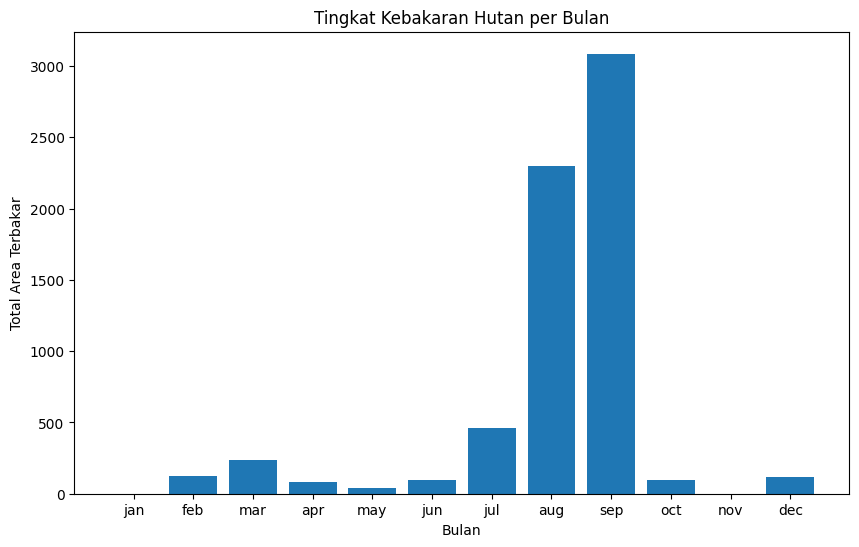

In [ ]:
df_copy = df[['month', 'area']]
df_copy = df_copy.dropna(subset=['month'])

# Hitung jumlah total area terbakar untuk setiap bulan
monthly_area = df.groupby('month')['area'].sum().reset_index()

# Urutkan bulan secara kronologis
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
monthly_area['month'] = pd.Categorical(monthly_area['month'], categories=months, ordered=True)
monthly_area = monthly_area.sort_values('month')

# Membuat plot diagram batang
plt.figure(figsize=(10, 6))
plt.bar(monthly_area['month'], monthly_area['area'])
plt.xlabel('Bulan')
plt.ylabel('Total Area Terbakar')
plt.title('Tingkat Kebakaran Hutan per Bulan')
plt.show()

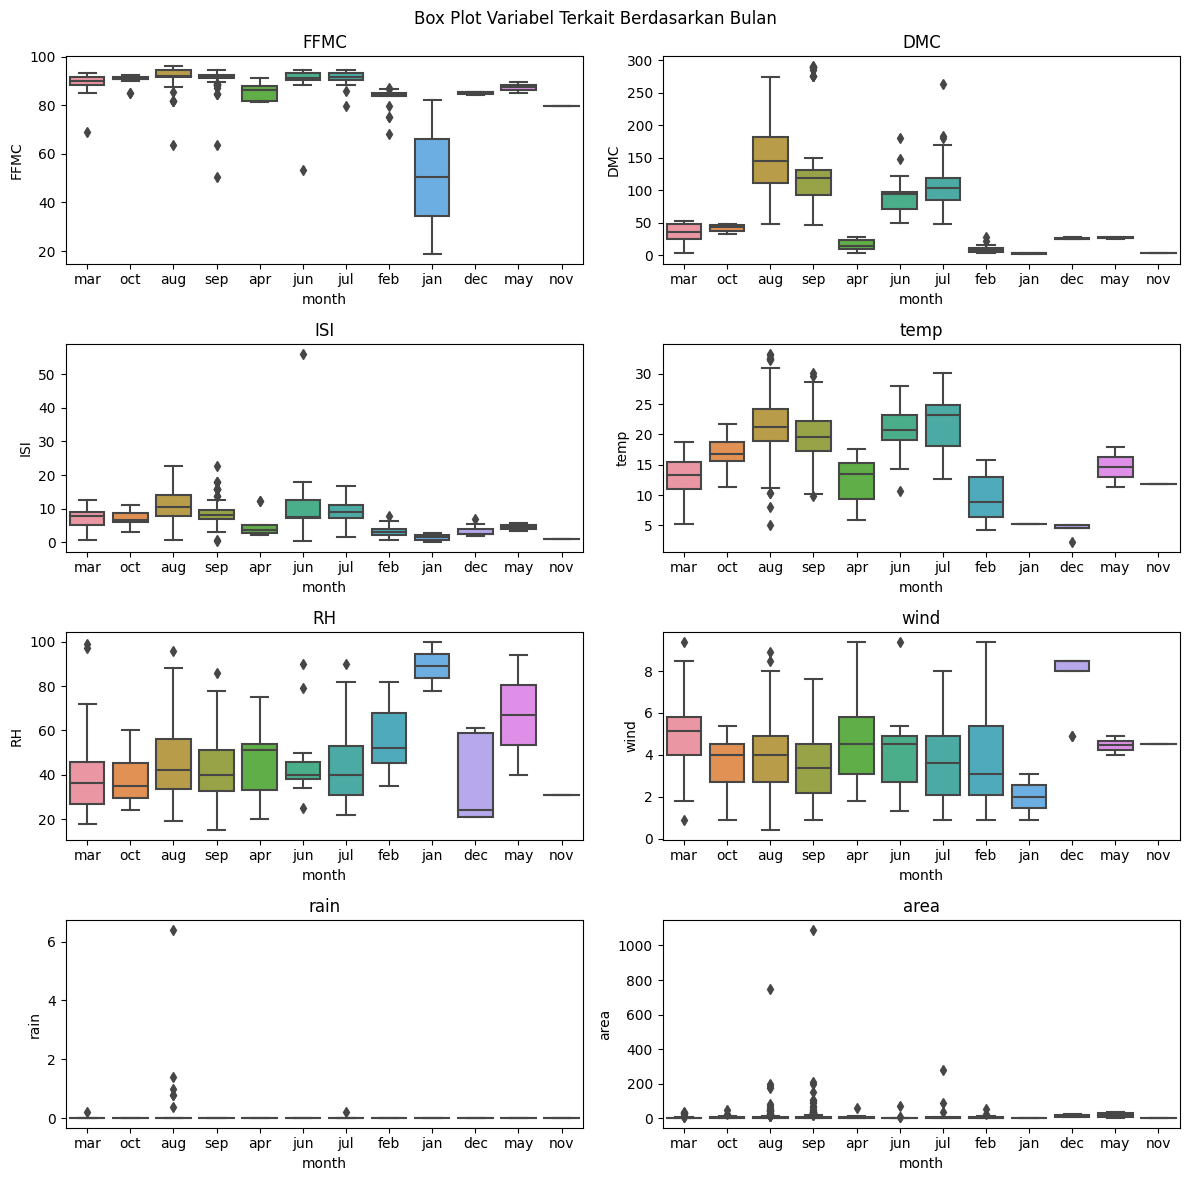

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(12, 12))
fig.suptitle('Box Plot Variabel Terkait Berdasarkan Bulan')

# Variabel yang ingin ditampilkan dalam box plot
variables = ['FFMC', 'DMC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

# Loop untuk setiap variabel
for i, variable in enumerate(variables):
    # Membagi subplot berdasarkan baris dan kolom
    row = i // 2
    col = i % 2

    # Membuat box plot menggunakan seaborn
    sns.boxplot(x='month', y=variable, data=df, ax=axes[row, col])
    axes[row, col].set_title(variable)

# Menampilkan plot
plt.tight_layout()
plt.show()

<ipython-input-131-253e1acc0929>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


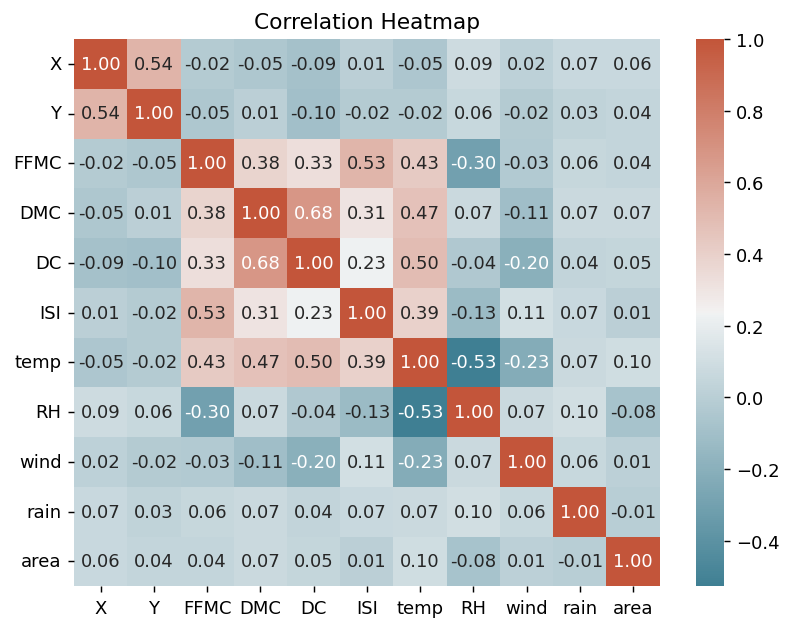

In [ ]:
# Korelasi data
corr = df.corr()

plt.figure(dpi=130)
sns.heatmap(corr, annot=True, fmt= '.2f', cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.tight_layout()
plt.title('Correlation Heatmap')
plt.show()

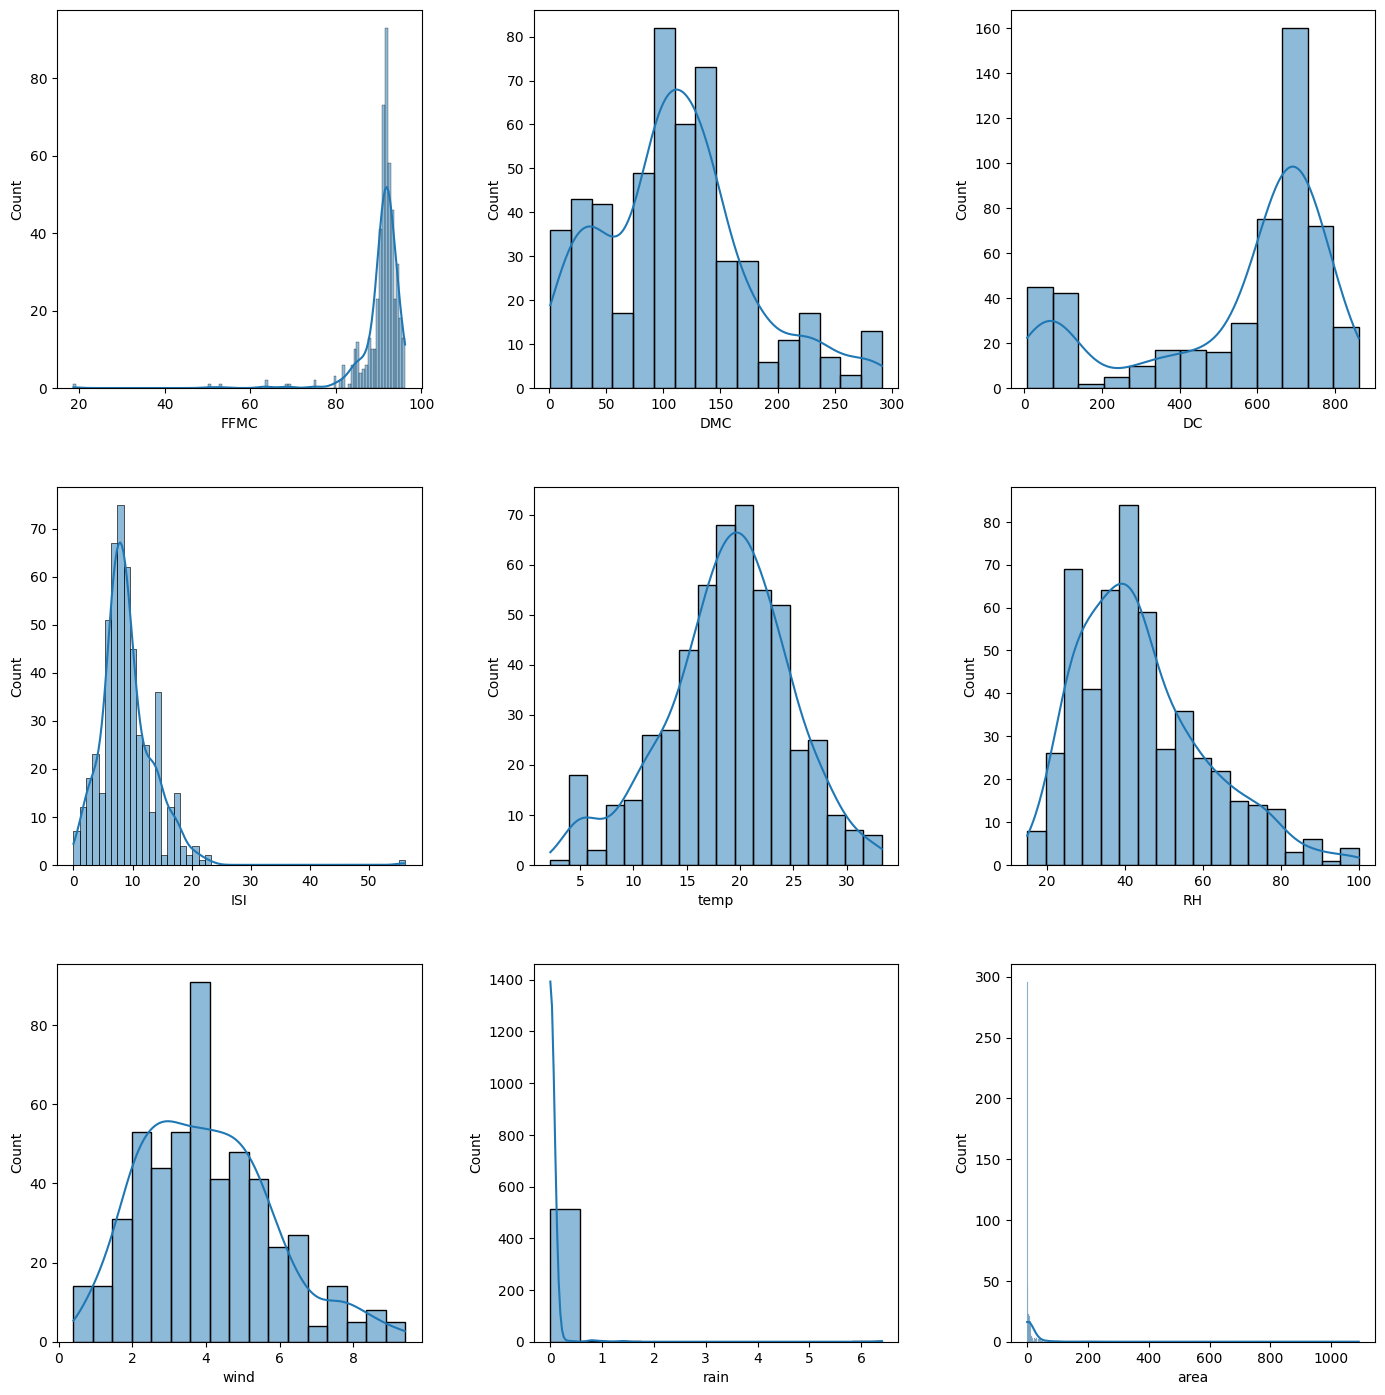

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.tight_layout(pad=5.0)

# Daftar variabel dalam dataset forestfire
columns = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

# Menggambar plot distribusi untuk setiap variabel

for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=df, x=column, ax=ax, kde=True)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.show()

In [ ]:
skewness = df.skew()
print(skewness)

X        0.036246
Y        0.417296
FFMC    -6.575606
DMC      0.547498
DC      -1.100445
ISI      2.536325
temp    -0.331172
RH       0.862904
wind     0.571001
rain    19.816344
area    12.846934
dtype: float64


<ipython-input-133-bcf117d781b8>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()


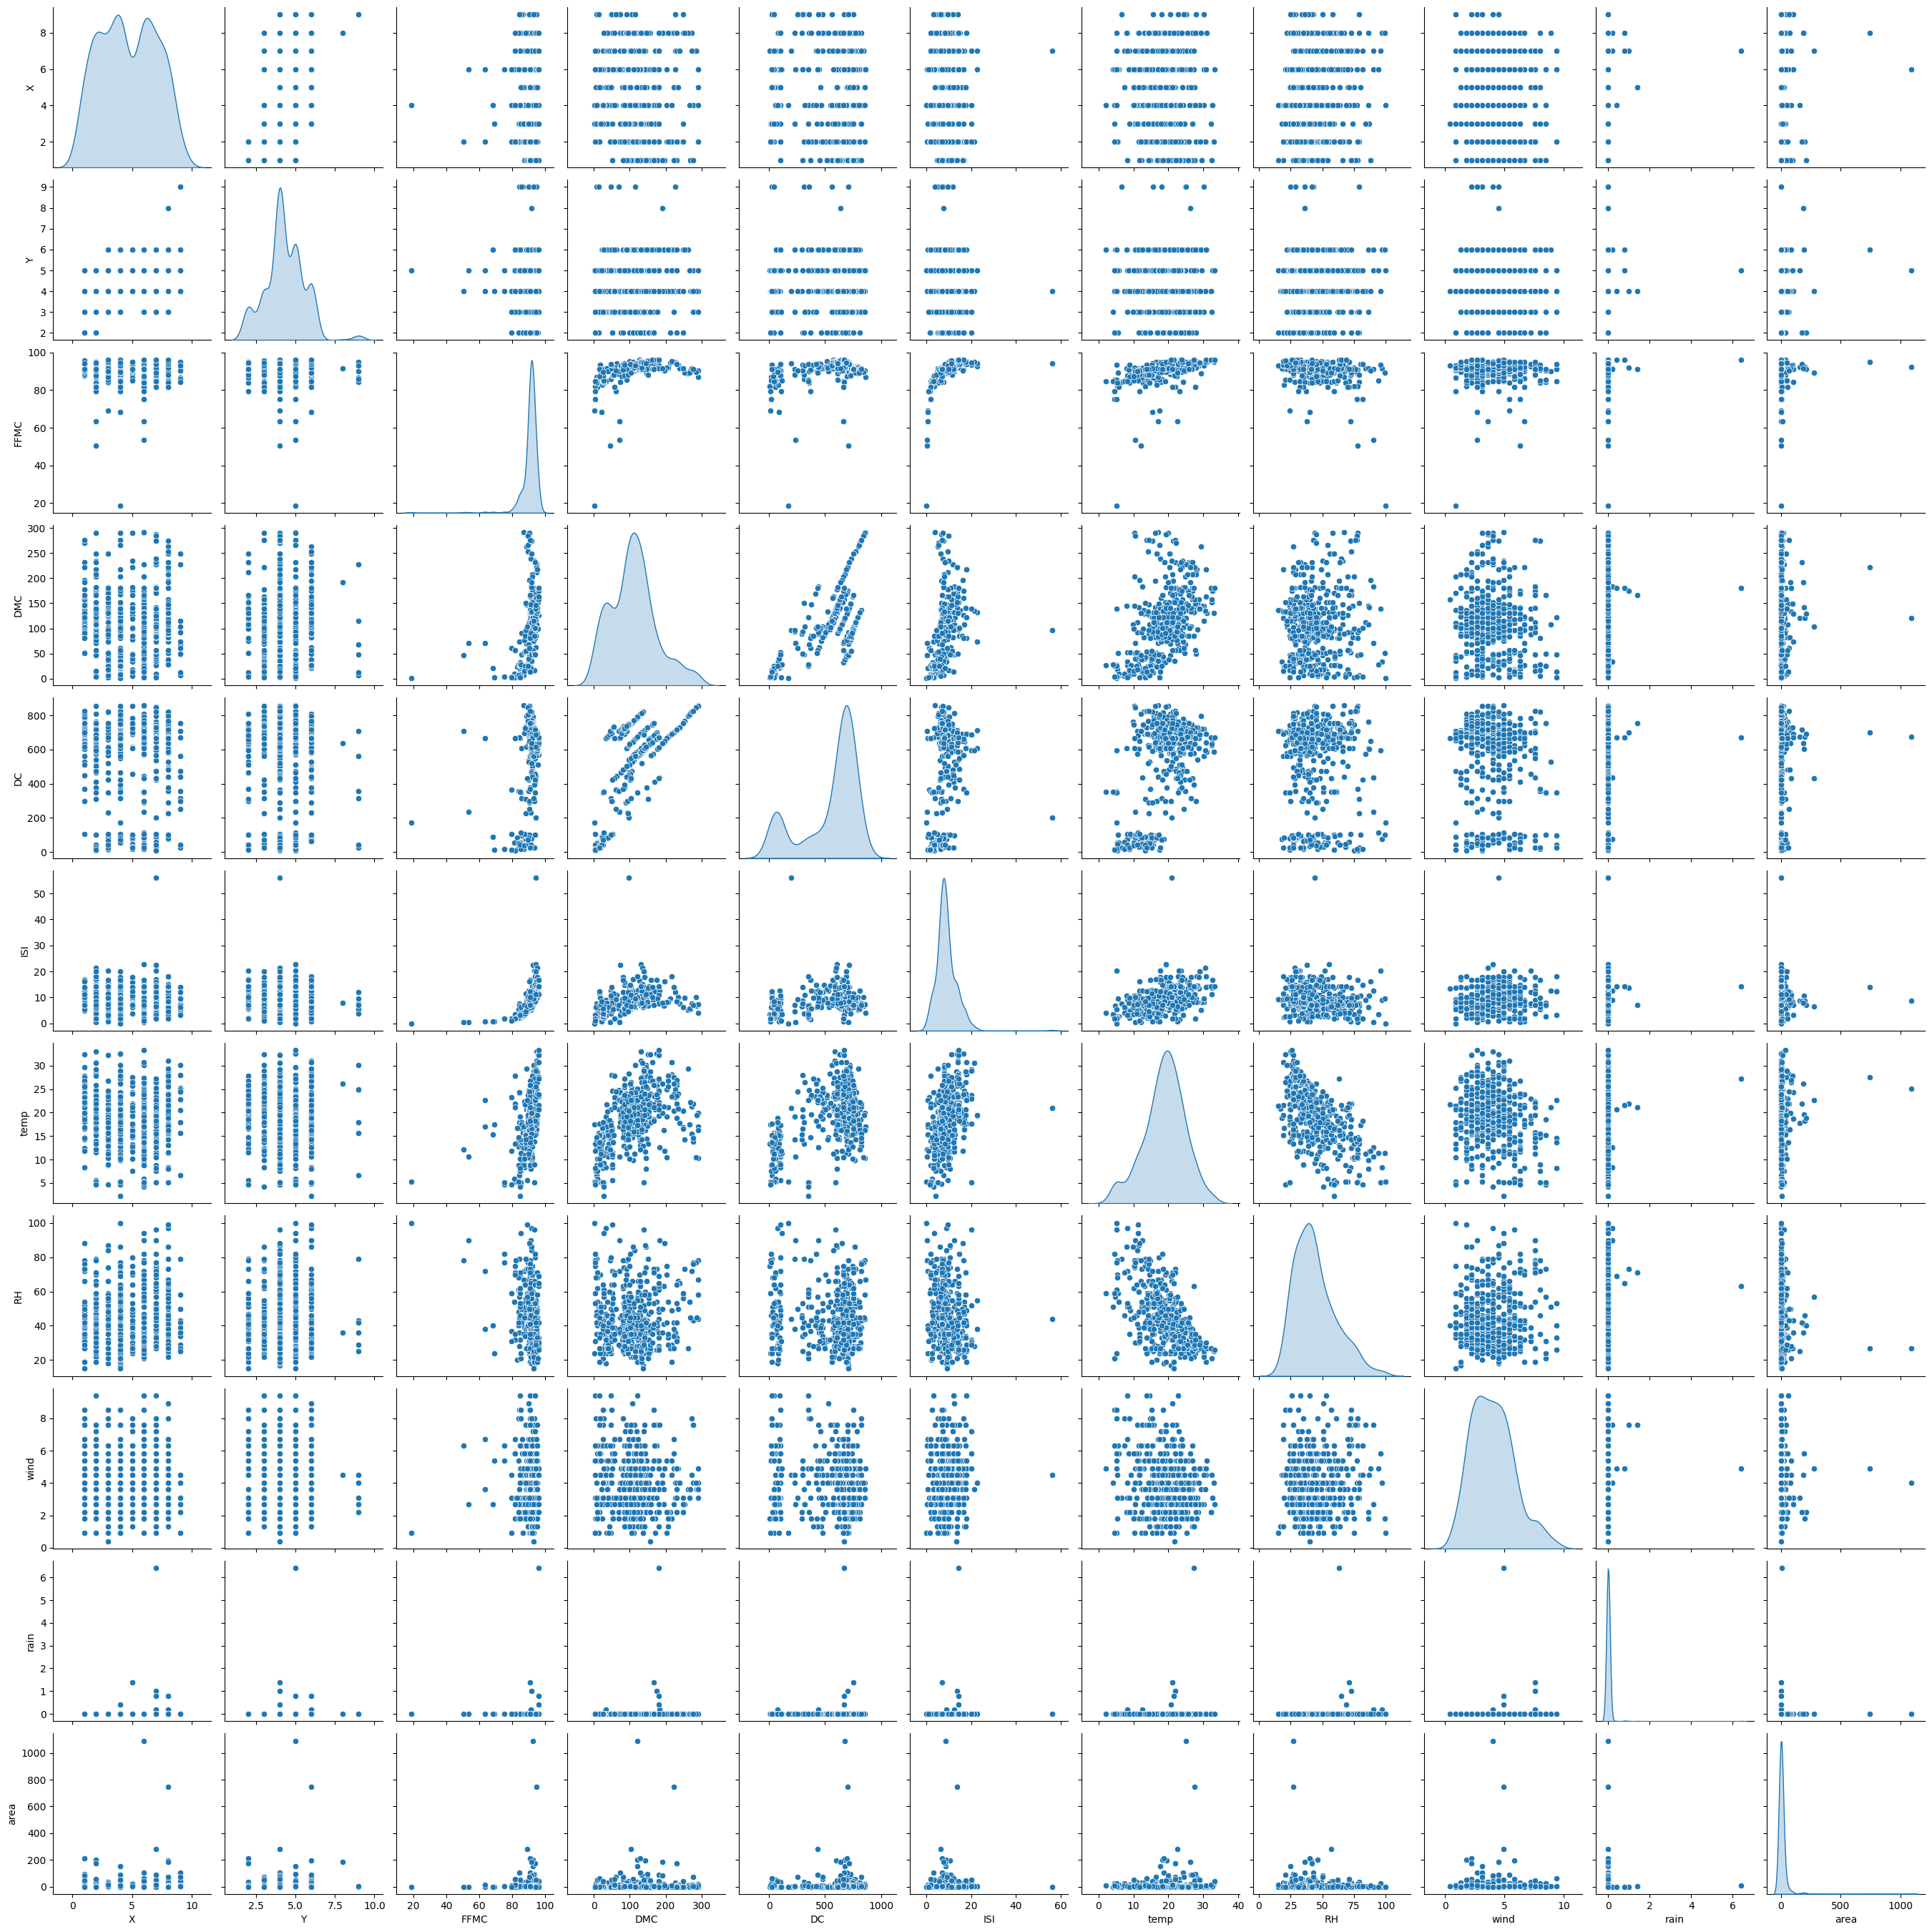

In [ ]:
sns.pairplot(df, diag_kind='kde')

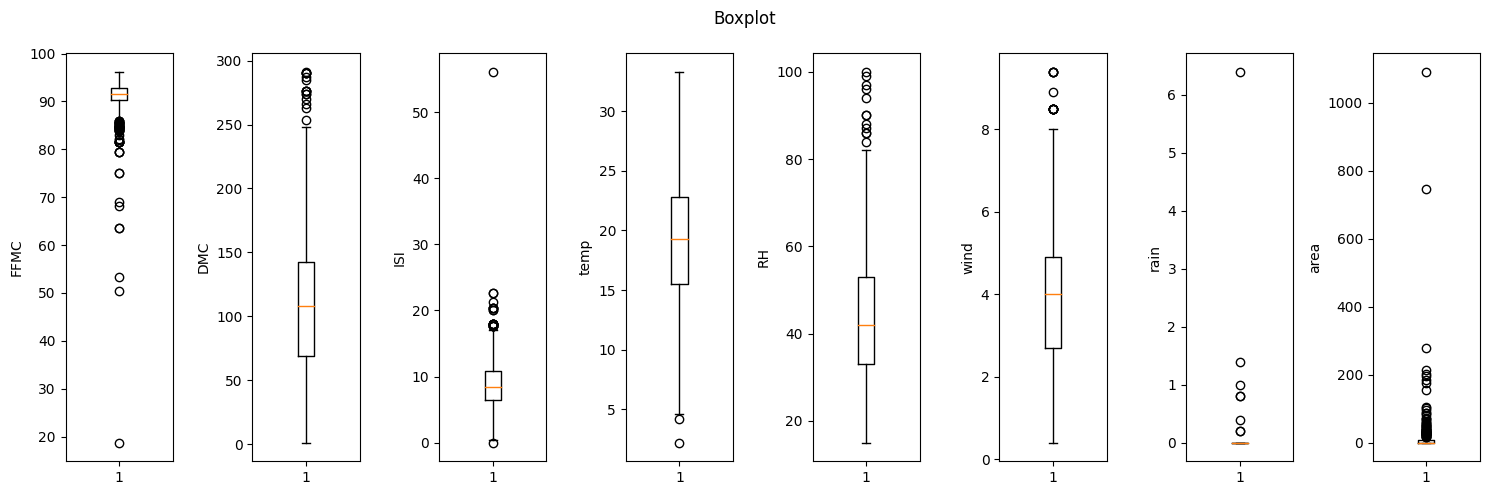

In [ ]:
# Pengecekan outliers masing-masing kolom
fig, axs = plt.subplots(1, 8, figsize=(15,5))
i = 0

num_cols = ['FFMC','DMC','ISI','temp','RH','wind','rain','area']

for col in num_cols:
  axs[i].boxplot(df[col])
  axs[i].set_ylabel(col)
  axs[i].tick_params(labelsize=10)
  i+=1


plt.suptitle('Boxplot')
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

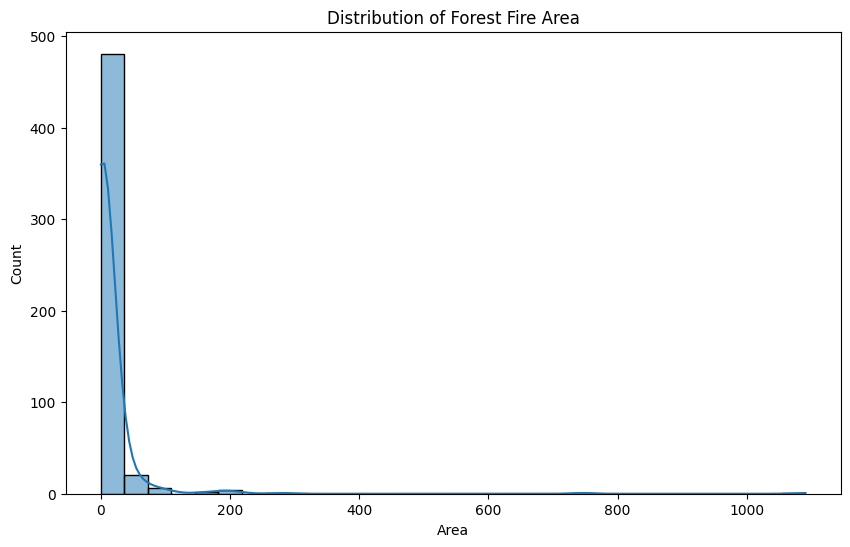

In [ ]:
# Histogram banyaknya kebakaran hutan yang terjadi
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='area', bins=30, kde=True)
plt.title('Distribution of Forest Fire Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

## Data Preprocessing

In [ ]:
# Pengecekan apakah terdapat data yang bernilai null
missing_data = pd.DataFrame({'Missing data': df.isnull().sum()})
missing_data.T

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
Missing data,0,0,0,0,0,0,0,0,0,0,0,0,0


Setelah dilakukan pengecekan, tidak terdapat data bernilai NULL.

In [ ]:
# Melakukan pengecekan data duplikat
df.duplicated(keep = False) # Apabila data duplikat maka akan bernilai True

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool

Setelah dilakukan pengecekan, tidak terdapat data duplikat.

In [ ]:
from scipy.stats import spearmanr

# Menghitung korelasi Spearman antara variabel 'temp' dan 'area'
correlation, p_value = spearmanr(df['temp'], df['area'])

# Menampilkan hasil korelasi dan p-value
print("Korelasi Spearman:", correlation)
print("Nilai p-value:", p_value)

Korelasi Spearman: 0.07869596317636426
Nilai p-value: 0.07380790385382502


In [ ]:
# Menentukan daftar kolom yang akan dibersihkan dari outlier (poin data ekstrem)
cols = ['FFMC', 'DMC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

# Membuat salinan dataframe untuk proses pembersihan data agar tidak memengaruhi dataframe asli
cleaned_data = df.copy()

# Loop melalui setiap kolom pada daftar kolom untuk membersihkan outlier dengan menggunakan metode IQR
for col in cols:
    # Menghitung kuartil 1 (Q1) dan kuartil 3 (Q3) dari kolom saat ini
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Menghitung Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas untuk outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti nilai-nilai di luar batas atas dan batas bawah dengan nilai batas atas dan bawah
    cleaned_data.loc[cleaned_data[col] > upper_bound, col] = upper_bound
    cleaned_data.loc[cleaned_data[col] < lower_bound, col] = lower_bound


Outlier yang bernilai diatas Q3 akan diubah menjadi nilai maksimum Q3, begitupula sebaliknya dengan nilai dibawah Q1 akan diubah menjadi nilai minimum Q1

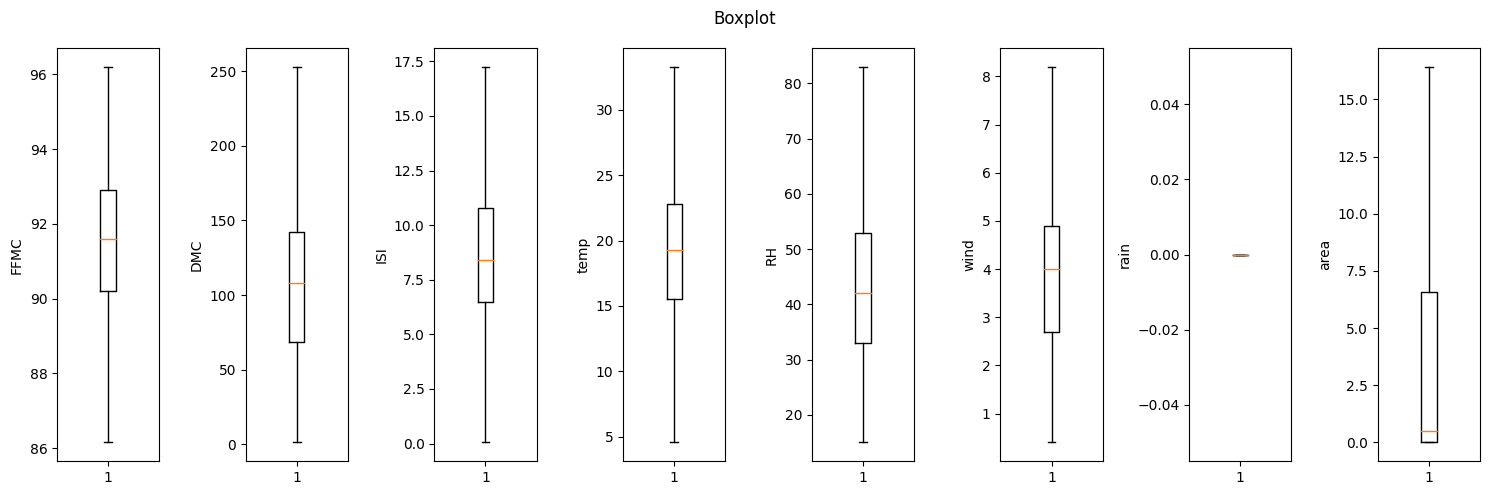

In [ ]:
# Pengecekan outliers masing-masing kolom
fig, axs = plt.subplots(1, 8, figsize=(15,5))
i = 0

num_cols = ['FFMC','DMC','ISI','temp','RH','wind','rain','area']

for col in num_cols:
  axs[i].boxplot(cleaned_data[col])
  axs[i].set_ylabel(col)
  axs[i].tick_params(labelsize=10)
  i+=1


plt.suptitle('Boxplot')
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Kolom yang akan digunakan untuk dinormalisasi
columns_to_normalize = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area']

# Melakukan Normalisasi data
df_norm = (cleaned_data[columns_to_normalize] - cleaned_data[columns_to_normalize].min()) / (cleaned_data[columns_to_normalize].max() - cleaned_data[columns_to_normalize].min())

In [ ]:
# Menggunakan RobustScaler untuk menangani outlier dengan mengurangi dampaknya terhadap scaling.
from sklearn.preprocessing import RobustScaler

# Inisialisasi RobustScaler untuk menangani scaling data
scaler = RobustScaler()

# Melakukan scaling pada fitur 'rain' dari dataframe df menggunakan RobustScaler
df_norm['rain'] = scaler.fit_transform(df[['rain']])

In [ ]:
# Memisahkan independent features dan target variable
df_copy = df_norm

x = df_copy.drop(['area'], axis=1) # Axis = 1 berarti kita akan meremove column area
y = df_copy['area']

# Ringkasan Metode
Metode yang akan digunakan pada project ini yaitu SVM sebagai baseline model. ANN, RandomForest dan LinearRegression sebagai Exploratory modelnya.

In [ ]:
# Baseline Model
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Melakukan split data dengan skala 80% untuk training 20% untuk test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat model SVM
svm_model = SVR(kernel='rbf')

# Melatih model svm
svm_model.fit(X_train_scaled, y_train)

# Membuat prediksi
y_pred = svm_model.predict(X_test_scaled)

# Mengevaluasi model
mse_svm = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_svm)

Mean Squared Error: 0.14992613056258017


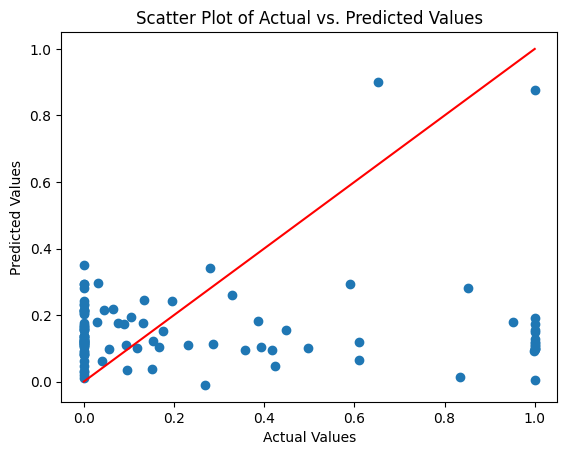

In [ ]:
import matplotlib.pyplot as plt

# Membuat scatter plot
plt.scatter(y_test, y_pred)

# Menambahkan label dan title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')

# Menambahkan garis diagonal sebagai referensi (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Menampilkan plot
plt.show()

## Model Exploration

In [ ]:
# Model Exploration (at least 3 scheme)

from keras.models import Sequential
from keras.layers import Dense, Dropout

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Model = Sequential()

# input layer
Model.add(Dense(6, input_dim=8, activation='linear'))
# hidden layer
Model.add(Dense(6, activation='tanh'))
Model.add(Dense(6, activation='tanh'))
# Output Layer
Model.add(Dense(1, activation='sigmoid'))
Model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 6)                 54        
                                                                 
 dense_21 (Dense)            (None, 6)                 42        
                                                                 
 dense_22 (Dense)            (None, 6)                 42        
                                                                 
 dense_23 (Dense)            (None, 1)                 7         
                                                                 
Total params: 145 (580.00 Byte)
Trainable params: 145 (580.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile Model
Model.compile(optimizer = 'adam', loss ='mean_squared_error')
# Train Model
history = Model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 50)

Epoch 1/50
13/13 [==============================] - 1s 18ms/step - loss: 0.1852 - val_loss: 0.1782
Epoch 2/50
13/13 [==============================] - 0s 6ms/step - loss: 0.1620 - val_loss: 0.1600
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.1456 - val_loss: 0.1480
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 0.1353 - val_loss: 0.1410
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 0.1289 - val_loss: 0.1379
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 0.1262 - val_loss: 0.1364
Epoch 7/50
13/13 [==============================] - 0s 7ms/step - loss: 0.1246 - val_loss: 0.1360
Epoch 8/50
13/13 [==============================] - 0s 6ms/step - loss: 0.1241 - val_loss: 0.1358
Epoch 9/50
13/13 [==============================] - 0s 7ms/step - loss: 0.1237 - val_loss: 0.1357
Epoch 10/50
13/13 [==============================] - 0s 7ms/step - loss: 0.1237 - val_loss: 0.1356
Epoch 11/50
13/13 

4/4 [==============================] - 0s 4ms/step


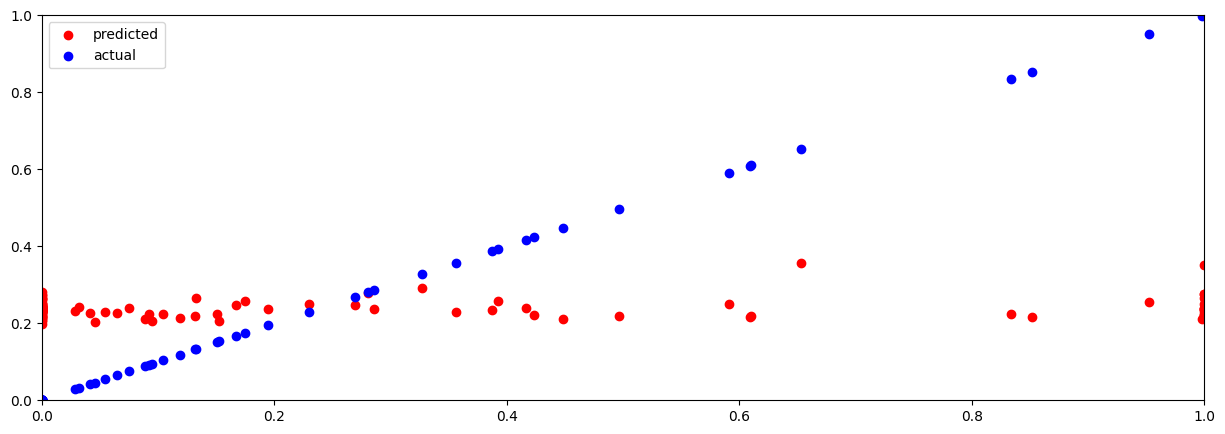

In [ ]:
# Membuat scatter plot
fig, axs = plt.subplots(1, 1, figsize=(15,5))

y_pred = Model.predict(x_test)

plt.scatter(y_test, y_pred, color='red', label='predicted')
plt.scatter(y_test, y_test, color='blue', label='actual')
axs.set_ylim(y_test.min(),y_test.max())
axs.set_xlim(y_test.min(),y_test.max())
plt.legend()

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Membuat model random forest
rf = RandomForestRegressor(random_state=42)

# Melatih model
rf.fit(X_train, y_train)

# Melakukan prediksi
y_pred_rf = rf.predict(X_test)

# Menghitung mse
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Mean Squared Error: ", mse_rf)

Mean Squared Error:  0.13408887810615402


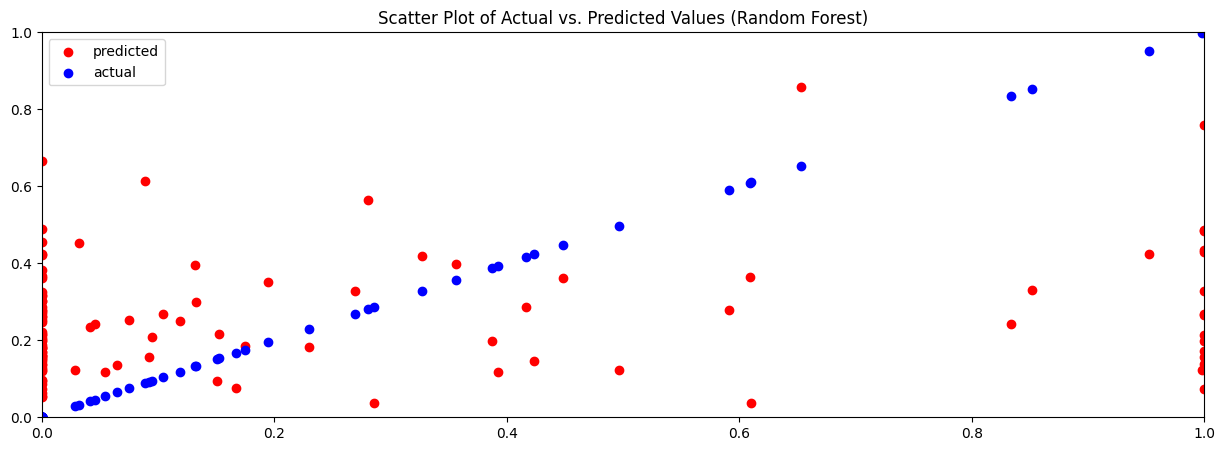

In [ ]:
# Membuat scatter plot
fig, axs = plt.subplots(1, 1, figsize=(15,5))

plt.scatter(y_test, y_pred_rf, color='red', label='predicted')
plt.scatter(y_test, y_test, color='blue', label='actual')
axs.set_ylim(y_test.min(),y_test.max())
axs.set_xlim(y_test.min(),y_test.max())
plt.title('Scatter Plot of Actual vs. Predicted Values (Random Forest)')
plt.legend()

plt.show()

Mean Squared Error: 0.1351892566556292


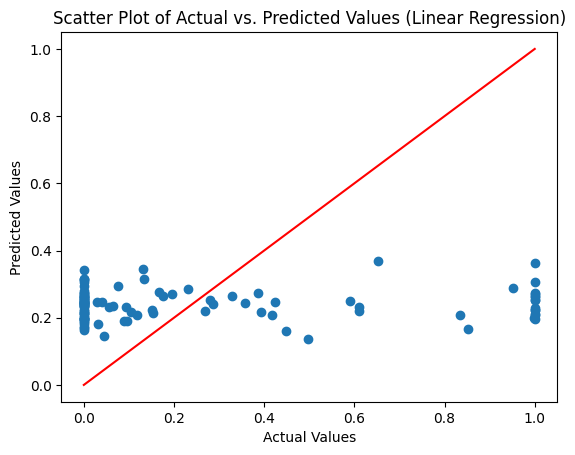

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Membuat model lineareregression
linear_model = LinearRegression()

# Melatih model
linear_model.fit(X_train, y_train)

# Membuat prediksi
y_pred = linear_model.predict(X_test)

# evaluasi model
mse_lin = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_lin)

# Membuat scatter plot
plt.scatter(y_test, y_pred)

# Menambahkan label dan judul
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values (Linear Regression)')

# Menambahkan garis diagonal sebagai referensi (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Menampilkan plot
plt.show()

In [ ]:
# Evaluation
train_mse = history.history['loss']

dict_eval = {
    'SVM' : mse_svm,
    'ann' : train_mse[-1],
    'Random Forest' : mse_rf,
    'Linear Regression': mse_lin}

dict_eval

{'SVM': 0.14992613056258017,
 'ann': 0.12145180255174637,
 'Random Forest': 0.13408887810615402,
 'Linear Regression': 0.1351892566556292}

# Hasil dan Analisis
Berdasarkan model yang telah dibuat, SVM menghasilkan MSE senilai 0.14992613056258017, ANN menghasilkan MSE 0.11971717327833176, Random Forest menghasilkan MSE 0.13408887810615402, dan Linear Regression menghasilkan MSE 0.1351892566556292. Nilai MSE yang optimal/baik adalah nilai yang mendekati angka 0, sehingga ANN menghasilkan hasil terbaik pada project ini.

# Kesimpulan
Berdasarkan kesimpulan yang didapatkan pada Hasil dan Analisis, ANN merupakan model yang menghasilkan nilai MSE terbaik. Namun, hasil prediksi yang lebih baik bisa didapatkan apabila pemrosesan data dilakukan dengan lebih baik lagi. Dataset yang diambil pada project ini tergolong dataset yang cukup sulit, sehingga nilai yang didapatkan tidak begitu memuaskan.